In [1]:
import os
from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import calendar
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_AIS3/data'

test = pd.read_csv(os.getenv('HOME')+'/aiffel/kaggle_AIS3/test.csv')
sales = pd.read_csv(os.getenv('HOME')+'/aiffel/kaggle_AIS3/sales_train.csv')
shops = pd.read_csv(os.getenv('HOME')+'/aiffel/kaggle_AIS3/shops.csv')
items = pd.read_csv(os.getenv('HOME')+'/aiffel/kaggle_AIS3/items.csv')
item_cats = pd.read_csv(os.getenv('HOME')+'/aiffel/kaggle_AIS3/item_categories.csv')

<AxesSubplot:xlabel='item_cnt_day'>

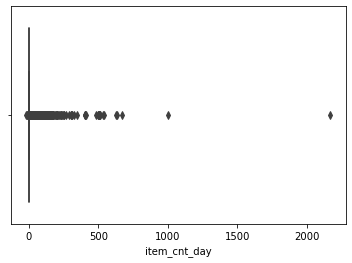

In [3]:
sns.boxplot(x=sales.item_cnt_day)

<AxesSubplot:xlabel='item_price'>

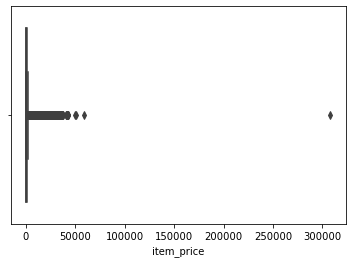

In [4]:
sns.boxplot(x=sales.item_price)

In [5]:
train = sales[(sales.item_price < 100000) & (sales.item_price > 0)]
train = train[sales.item_cnt_day < 1001]

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:xlabel='item_cnt_day'>

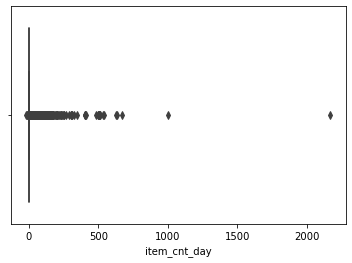

In [6]:
sns.boxplot(x=sales.item_cnt_day)

In [7]:
sales.head()
# item_cnt_day를 -1로 할지?

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [9]:
# Якутск Орджоникидзе, 56
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57

# Якутск ТЦ "Центральный"
train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58

# РостовНаДону ТРК "Мегацентр Горизонт"
train.loc[train.shop_id == 40, 'shop_id'] = 39
test.loc[test.shop_id == 40, 'shop_id'] = 39

# Жуковский ул. Чкалова 39м²
train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11

In [10]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [11]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [38]:
sales.loc[(sales.item_id == 32)&(sales.shop_id == 0)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
40085,03.01.2013,0,0,32,221.0,2.0
40086,21.01.2013,0,0,32,221.0,2.0
40087,25.01.2013,0,0,32,221.0,1.0
40088,31.01.2013,0,0,32,221.0,1.0
173447,25.02.2013,1,0,32,221.0,1.0
173448,22.02.2013,1,0,32,221.0,2.0
173449,16.02.2013,1,0,32,221.0,2.0
173450,15.02.2013,1,0,32,221.0,1.0
173452,12.02.2013,1,0,32,221.0,2.0
173453,05.02.2013,1,0,32,221.0,1.0


In [12]:
cur_price = train[['date_block_num','item_id','item_price']]
cur_price

,date_block_num,item_id,item_price
0,0,22154,999.00
1,0,2552,899.00
2,0,2552,899.00
3,0,2554,1709.05
4,0,2555,1099.00
...,...,...,...
2935844,33,7409,299.00
2935845,33,7460,299.00
2935846,33,7459,349.00
2935847,33,7440,299.00


In [41]:
monthly_sales=train.groupby(["date_block_num","shop_id","item_id"])[
    "item_price","item_cnt_day"].agg({"item_price" : "mean","item_cnt_day":"sum"})

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [42]:
monthly_sales.head(20)

item_price  item_cnt_day
date_block_num shop_id item_id                          
0              2       27           2499.0           1.0
                       33            499.0           1.0
                       317           299.0           1.0
                       438           299.0           1.0
                       471           399.0           2.0
                       481           330.0           1.0
                       482          3300.0           1.0
                       484           300.0           2.0
                       491           600.0           1.0
                       534           399.0           2.0
                       556           199.0           1.0
                       642           149.0           2.0
                       651           149.0           2.0
                       657           149.0           3.0
                       677           149.0           3.0
                       700           199.0           4.0
                       785           349.0           1.0
                       791           600.0           2.0
                       804           240.0           1.0
                       839          3300.0           1.0

In [ ]:
ts=train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

In [22]:
cur_price.drop_duplicates(subset=['item_id','date_block_num'])
cur_price

,date_block_num,item_id,item_price
0,0,22154,999.00
1,0,2552,899.00
2,0,2552,899.00
3,0,2554,1709.05
4,0,2555,1099.00
...,...,...,...
2935844,33,7409,299.00
2935845,33,7460,299.00
2935846,33,7459,349.00
2935847,33,7440,299.00


In [28]:
cur_price.loc[cur_price.item_id == 32]

,date_block_num,item_id,item_price
2568,0,32,349.0
2580,0,32,349.0
3230,0,32,349.0
3231,0,32,349.0
3232,0,32,349.0
...,...,...,...
2928375,33,32,149.0
2928973,33,32,149.0
2930037,33,32,149.0
2930038,33,32,149.0


In [14]:
# https://www.kaggle.com/uladzimirkapeika/feature-engineering-lightgbm-top-1
index_cols = ['shop_id', 'item_id', 'date_block_num']

df = [] 
for block_num in train['date_block_num'].unique():
    cur_shops = train.loc[sales['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = train.loc[sales['date_block_num'] == block_num, 'item_id'].unique()
    df.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

df = pd.DataFrame(np.vstack(df), columns = index_cols,dtype=np.int32)
# ratings_title_num= pd.merge(ratings_title, movies[['title','movie_id']], on='title', how='left')
#Add month sales
group = train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': ['sum']})
group.columns = ['item_cnt_month']
group.reset_index(inplace=True)

df = pd.merge(df, group, on=index_cols, how='left')
df['item_cnt_month'] = (df['item_cnt_month']
                                .fillna(0)
                                .clip(0,20)
                                .astype(np.float16))
df.head(5)

,shop_id,item_id,date_block_num,item_cnt_month
0,59,22154,0,1.0
1,59,2552,0,0.0
2,59,2554,0,0.0
3,59,2555,0,0.0
4,59,2564,0,0.0


In [15]:
del group

In [ ]:
df1 = pd.merge(df, cur_price,how='left', left_on='item_id', right_on='date_block_num')

In [ ]:
test['date_block_num'] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)
df = pd.concat([df, test], ignore_index=True, sort=False, keys=index_cols)
df.fillna(0, inplace=True)
df.tail(30)

In [ ]:
test.tail(30)

In [ ]:
df.head(30)

In [ ]:
shops['city'] = shops['shop_name'].apply(lambda x: x.split()[0].lower())
shops.loc[shops.city == '!якутск', 'city'] = 'якутск'
shops['city_code'] = LabelEncoder().fit_transform(shops['city'])

coords = dict()
coords['якутск'] = (62.028098, 129.732555, 4)
coords['адыгея'] = (44.609764, 40.100516, 3)
coords['балашиха'] = (55.8094500, 37.9580600, 1)
coords['волжский'] = (53.4305800, 50.1190000, 3)
coords['вологда'] = (59.2239000, 39.8839800, 2)
coords['воронеж'] = (51.6720400, 39.1843000, 3)
coords['выездная'] = (0, 0, 0)
coords['жуковский'] = (55.5952800, 38.1202800, 1)
coords['интернет-магазин'] = (0, 0, 0)
coords['казань'] = (55.7887400, 49.1221400, 4)
coords['калуга'] = (54.5293000, 36.2754200, 4)
coords['коломна'] = (55.0794400, 38.7783300, 4)
coords['красноярск'] = (56.0183900, 92.8671700, 4)
coords['курск'] = (51.7373300, 36.1873500, 3)
coords['москва'] = (55.7522200, 37.6155600, 1)
coords['мытищи'] = (55.9116300, 37.7307600, 1)
coords['н.новгород'] = (56.3286700, 44.0020500, 4)
coords['новосибирск'] = (55.0415000, 82.9346000, 4)
coords['омск'] = (54.9924400, 73.3685900, 4)
coords['ростовнадону'] = (47.2313500, 39.7232800, 3)
coords['спб'] = (59.9386300, 30.3141300, 2)
coords['самара'] = (53.2000700, 50.1500000, 4)
coords['сергиев'] = (56.3000000, 38.1333300, 4)
coords['сургут'] = (61.2500000, 73.4166700, 4)
coords['томск'] = (56.4977100, 84.9743700, 4)
coords['тюмень'] = (57.1522200, 65.5272200, 4)
coords['уфа'] = (54.7430600, 55.9677900, 4)
coords['химки'] = (55.8970400, 37.4296900, 1)
coords['цифровой'] = (0, 0, 0)
coords['чехов'] = (55.1477000, 37.4772800, 4)
coords['ярославль'] = (57.6298700, 39.8736800, 2) 

shops['city_coord_1'] = shops['city'].apply(lambda x: coords[x][0])
shops['city_coord_2'] = shops['city'].apply(lambda x: coords[x][1])
shops['country_part'] = shops['city'].apply(lambda x: coords[x][2])

shops = shops[['shop_id', 'city_code', 'city_coord_1', 'city_coord_2', 'country_part']]

In [ ]:
df = pd.merge(df, shops, on=['shop_id'], how='left')

In [ ]:
df.head(40)

In [ ]:
map_dict = {
            'Чистые носители (штучные)': 'Чистые носители',
            'Чистые носители (шпиль)' : 'Чистые носители',
            'PC ': 'Аксессуары',
            'Служебные': 'Служебные '
            }

items = pd.merge(items, item_cats, on='item_category_id')

items['item_category'] = items['item_category_name'].apply(lambda x: x.split('-')[0])
items['item_category'] = items['item_category'].apply(lambda x: map_dict[x] if x in map_dict.keys() else x)
items['item_category_common'] = LabelEncoder().fit_transform(items['item_category'])

items['item_category_code'] = LabelEncoder().fit_transform(items['item_category_name'])
items = items[['item_id', 'item_category_common', 'item_category_code']]

In [ ]:
df = pd.merge(df, items, on=['item_id'], how='left')

In [ ]:
df.head(40)

In [ ]:
items

In [ ]:
def count_days(date_block_num):
    year = 2013 + date_block_num // 12
    month = 1 + date_block_num % 12
    weeknd_count = len([1 for i in calendar.monthcalendar(year, month) if i[6] != 0])
    days_in_month = calendar.monthrange(year, month)[1]
    return weeknd_count, days_in_month, month

map_dict = {i: count_days(i) for i in range(35)}

df['weeknd_count'] = df['date_block_num'].apply(lambda x: map_dict[x][0])
df['days_in_month'] = df['date_block_num'].apply(lambda x: map_dict[x][1])

In [ ]:
df.head(40)